In [1]:
# Made Imports how we learned in bootcamp, we relied more on matplotlib and seaborn for visualizations :)
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Scaler code is usually made universally the same, junst need to adjust num_cols to the non id columns and ensure the df is correctly named
num_cols = ['price_change_percentage_24h', 'price_change_percentage_7d','price_change_percentage_14d', 'price_change_percentage_30d',
            'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']

# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df_market_data.loc[:, num_cols])

StandardScaler()

In [7]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original DataFrame
# Set the coin_id column as index
# Display the scaled DataFrame
df_scaled = pd.DataFrame(ss.transform(df_market_data.loc[:, num_cols]), columns=num_cols, index=df_market_data.index)
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
 # Create a a list to store inertia values and the values of k
k = list(range(2, 11))

In [9]:
# Create an empty list to store the inertia values
inertia = []
s_scores = []
vrc_scores = []
X = df_scaled

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

In [10]:
# Create a dictionary with the data to plot the Elbow curve
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}

# Create a DataFrame with the data to plot the Elbow curve
df_metrics = pd.DataFrame(metrics)
df_metrics.head()

,k,inertia,s_score,vrc_scores
0,2,212.123342,0.690885,13.766470
1,3,165.136752,0.260810,14.021117
2,4,79.022435,0.314482,32.459853
3,5,66.413051,0.323913,29.892958
4,6,61.634088,0.251616,25.595599


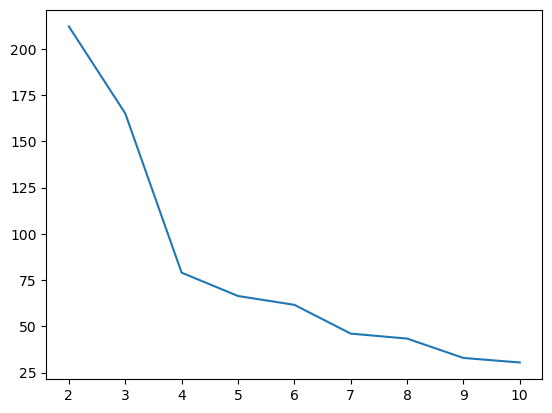

In [11]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(df_metrics.k, df_metrics.inertia)
plt.show() # (Optimal value of 4)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [13]:
# Fit the K-Means model using the scaled DataFrame
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
# Create a copy of the scaled DataFrame
df_sub = X.copy()

In [16]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_sub['clusters'] = preds

# Display the copy of the scaled DataFrame
df_sub.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


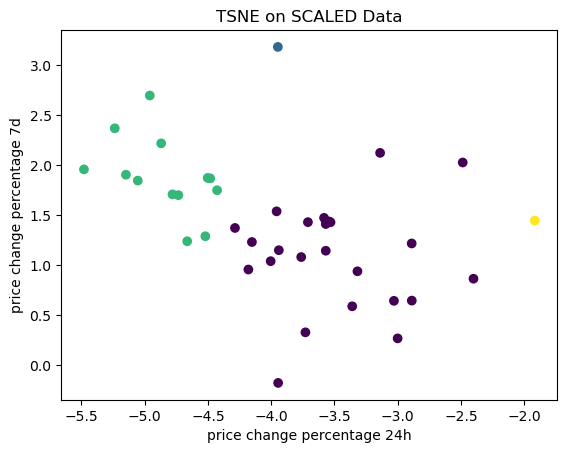

In [17]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Only shown using matplotlib in bootcamp
# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on SCALED Data")
plt.xlabel("price change percentage 24h")
plt.ylabel("price change percentage 7d")
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3
pca = PCA(n_components)

# Fit the PCA model on the preprocessed DataFrame

In [19]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

# View the scaled PCA data
df_pca.head()

,PCA_1,PCA_2,PCA_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [20]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.3719856  0.34700813 0.17603793]


0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 89.50% of the original dataset.

In [21]:
# Create a new DataFrame with the PCA data.
# Already created df_pca

# Copy the crypto names from the original scaled DataFrame
# Set the coin_id column as index
df_pca.index = df_market_data.index

# Display the scaled PCA DataFrame
df_pca.head()


,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [22]:
# Create a list with the number of k-values from 1 to 11
k = list(range(2, 11))

In [23]:
# Create an empty list to store the inertia values
inertia = []
s_scores = []
vrc_scores = []
X = df_pca

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

In [24]:
# Create a dictionary with the data to plot the Elbow curve
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}

# Create a DataFrame with the data to plot the Elbow curve
df_pca_metrics = pd.DataFrame(metrics)
df_pca_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,182.339530,0.728406,15.941950
1,3,135.442408,0.356130,17.034560
2,4,49.665497,0.420800,51.455694
3,5,38.672582,0.405662,50.780512
4,6,34.507577,0.334511,45.107936
5,7,23.728365,0.375378,55.678472
6,8,18.574523,0.316385,60.481348
7,9,15.572672,0.323751,61.980734
8,10,11.407667,0.350621,74.116423


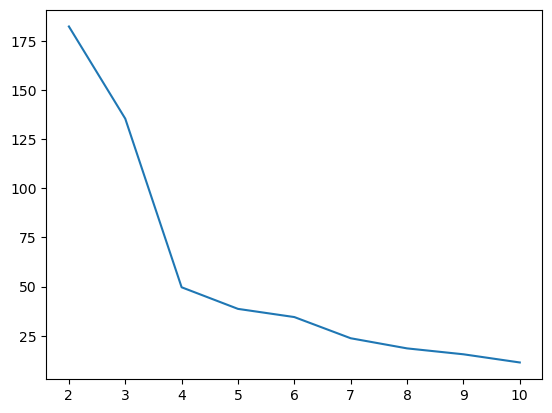

In [25]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(df_pca_metrics.k, df_pca_metrics.inertia)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Nope

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [27]:
# Fit the K-Means model using the PCA data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [29]:
# Create a copy of the scaled PCA DataFrame
df_pca_sub = X.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_sub['clusters'] = preds

# Display the copy of the scaled PCA DataFrame
df_pca_sub.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


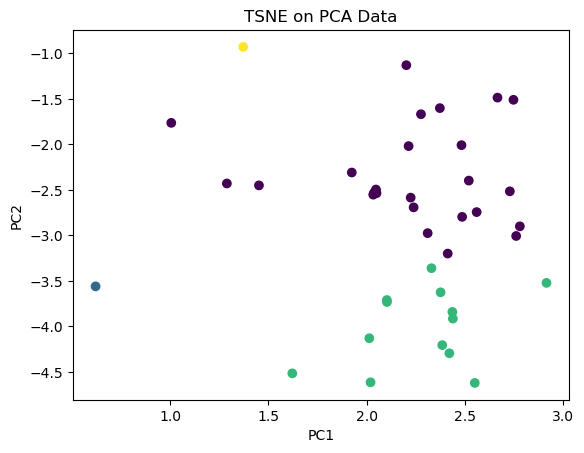

In [30]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca))

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_pca_sub.clusters)
plt.title("TSNE on PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

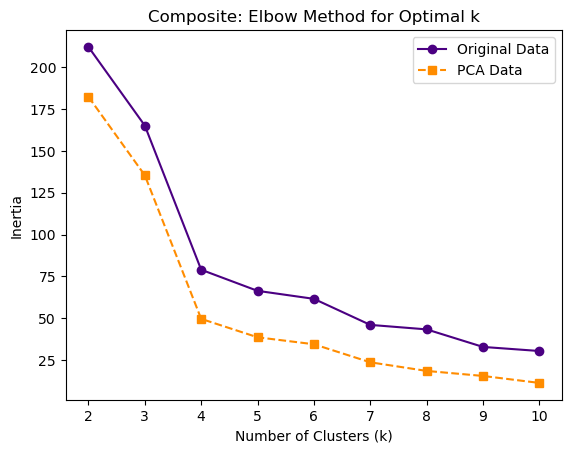

In [31]:
# Composite plot to contrast the Elbow curves

# Plot the elbow curves
plt.plot(df_metrics.k, df_metrics.inertia, marker='o', linestyle='-', label='Original Data', color='Indigo')
plt.plot(df_pca_metrics.k, df_pca_metrics.inertia, marker='s', linestyle='--', label='PCA Data', color='darkorange')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Composite: Elbow Method for Optimal k")
plt.legend()

# Show the composite plot
plt.show()

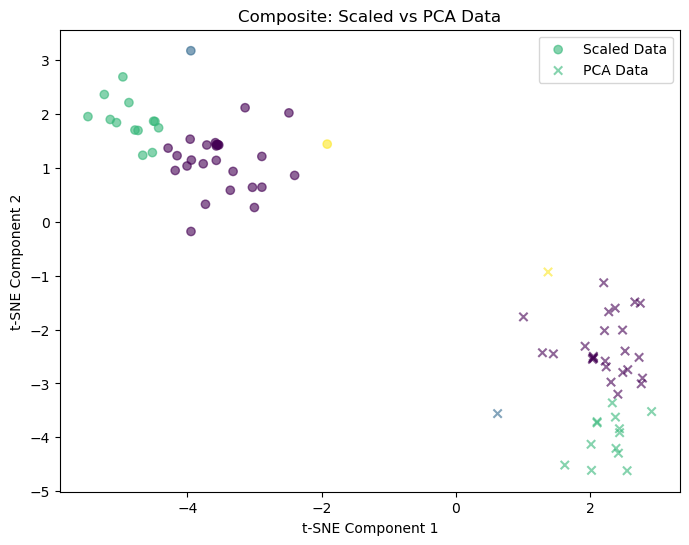

In [32]:
# Composite plot to contrast the clusters
# Scaled Data
tsne = TSNE(random_state=42)
df_tsne_scaled = pd.DataFrame(tsne.fit_transform(df_scaled), index=df_scaled.index)

# PCA Data
tsne = TSNE(random_state=42)
df_tsne_pca = pd.DataFrame(tsne.fit_transform(df_pca), index=df_pca.index)

# Create a figure
plt.figure(figsize=(8, 6))

# Plot both clusters
plt.scatter(df_tsne_scaled[0], df_tsne_scaled[1], c=df_sub.clusters, marker='o', alpha=0.6, label='Scaled Data')
plt.scatter(df_tsne_pca[0], df_tsne_pca[1], c=df_pca_sub.clusters, marker='x', alpha=0.6, label='PCA Data')

# Labels, Title, and Legend
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Composite: Scaled vs PCA Data")
plt.legend()

# Show the plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** There is lesser variability in the PCA, since the whole point is to streamline by choosing what it sees as the most important components. This creates groups to be more visually separate and outliers to be further away, basically clusteres are typically more distinct.

In [33]:
# Again, in the bootcamp, we were taught not to use hvPlot. Thanks! :))